In [94]:
import numpy as np
import sklearn.datasets as ds
# print(ds)
import matplotlib.pyplot as plt # pyplot - imperative interface

iris = ds.load_iris()
# print(iris)

iris_x=iris["data"]
iris_y=iris["target"]
iris_x_labels = iris["feature_names"]
iris_y_labels = iris["target_names"]

setosa = np.where(iris_y==0)
versicolor = np.where(iris_y==1)
virginica = np.where(iris_y==2)

([<matplotlib.patches.Wedge at 0x7ae586ebf890>,
 [Text(0.5749999709776996, 0.9959292311081369, 'setosa'),
  Text(-1.0999999999999959, -9.616505800409723e-08, 'versicolor'),
  Text(0.5500003659264657, -0.9526277328950455, 'virginica')],
 [Text(0.324999983596091, 0.562916521930686, '33.333%'),
  Text(-0.5999999999999978, -5.2453668002234845e-08, '33.333%'),
  Text(0.30000019959625396, -0.5196151270336611, '33.333%')])

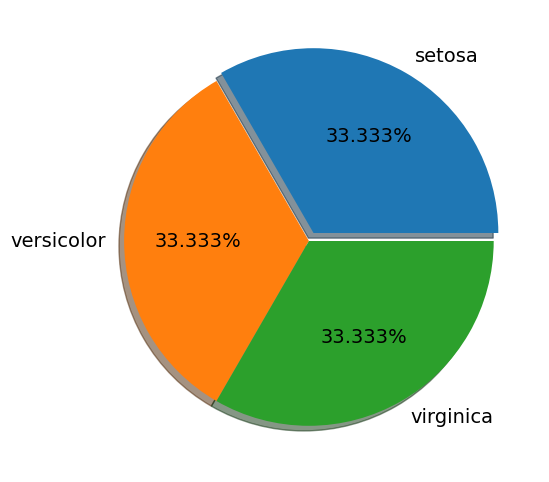

In [24]:
(unique, counts) = np.unique(iris_y, return_counts=True)
# print(unique, counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=iris_y_labels, autopct="%1.3f%%", shadow=True, explode=(0.05, 0,0), textprops={"fontsize":14})


Text(0.5, 1.0, 'Iris class distribution')

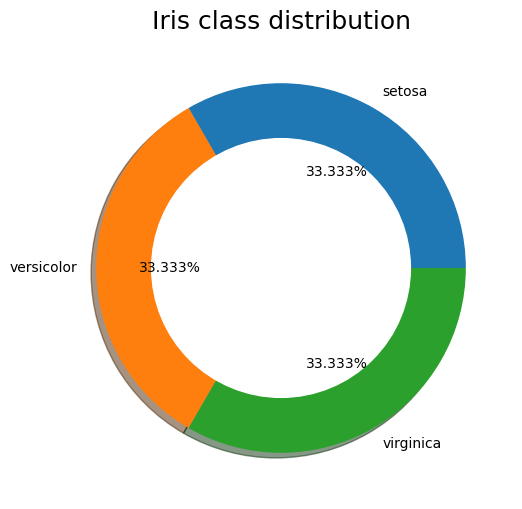

In [26]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=iris_y_labels, autopct="%1.3f%%", shadow=True, )
circle=plt.Circle(xy=(0,0), radius=0.7, color="white")
plt.gca().add_artist(circle)
plt.title("Iris class distribution", size=18)

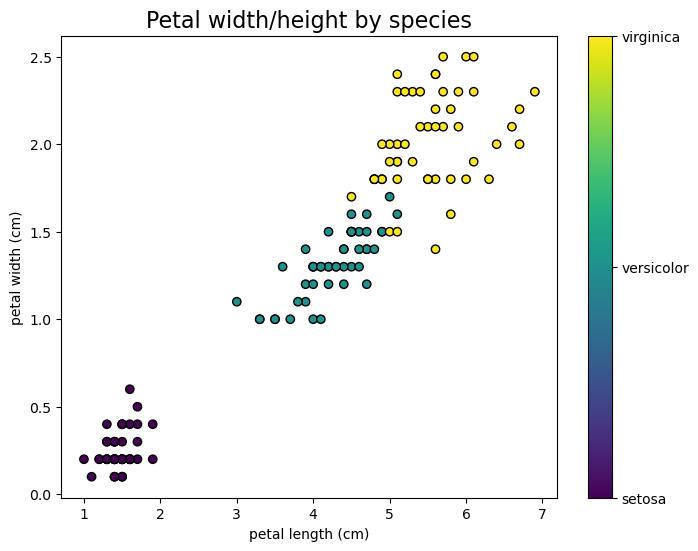

In [35]:
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda v, _: iris_y_labels[v])

plt.figure(figsize=(8,6))
plt.scatter(iris_x[:,2], iris_x[:,3], c=iris_y, edgecolor="k")
plt.xlabel(iris_x_labels[2])
plt.ylabel(iris_x_labels[3])
plt.title("Petal width/height by species", size=16)
plt.colorbar(ticks=[0,1,2], format=formatter)

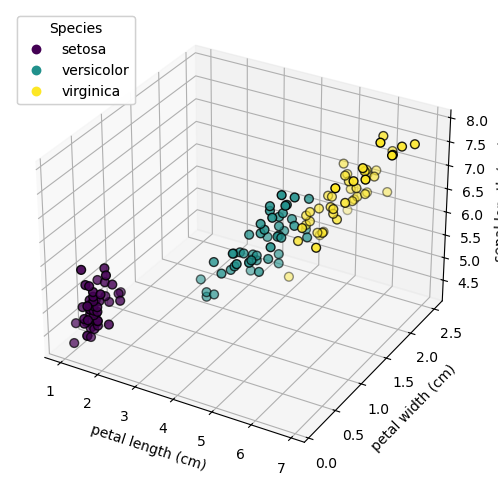

In [51]:
# from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(9,6))
# ax=Axes3D(fig, elev=-160, azim=130)
ax = fig.add_subplot(111, projection='3d')  # Modern 3D axis
ax.set_xlabel(iris_x_labels[2])
ax.set_ylabel(iris_x_labels[3])
ax.set_zlabel(iris_x_labels[0])

scatter = ax.scatter(iris_x[:,2], iris_x[:,3], iris_x[:,0], edgecolor="k", c=iris_y, s=40)
handles, _ =scatter.legend_elements()
legend = ax.legend(handles, iris_y_labels, loc="upper left", title="Species")
ax.add_artist(legend)

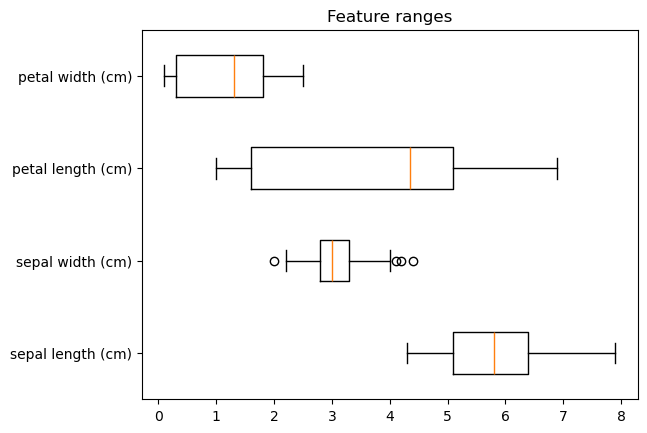

In [54]:
plt.boxplot(iris_x, tick_labels=iris_x_labels, vert=False)
plt.title("Feature ranges")
plt.show()

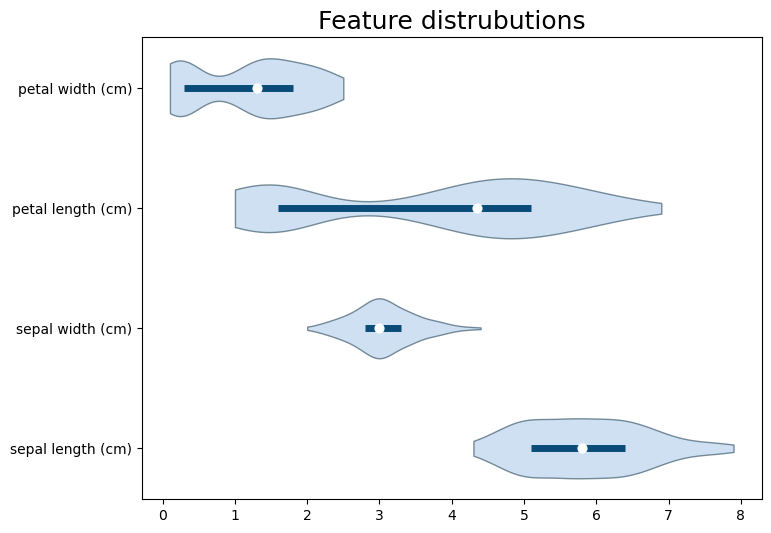

In [67]:
q1, median, q3 = np.percentile(iris_x, [25,50,75], axis=0)

plt.figure(figsize=(8,6))
parts = plt.violinplot(iris_x, vert=False, showextrema=False)

for pc in parts["bodies"]:
    pc.set_facecolor("#9ec2e6")
    pc.set_edgecolor("#01263a")
    pc.set_alpha(0.5)

plt.title("Feature distrubutions", size=18)
plt.yticks([1,2,3,4], iris_x_labels)

plt.gca().scatter(median, [1,2,3,4], color="white", s=40, zorder=3)
plt.gca().hlines([1,2,3,4], q1,q3, color="#0a4b78", lw=5)

plt.show()

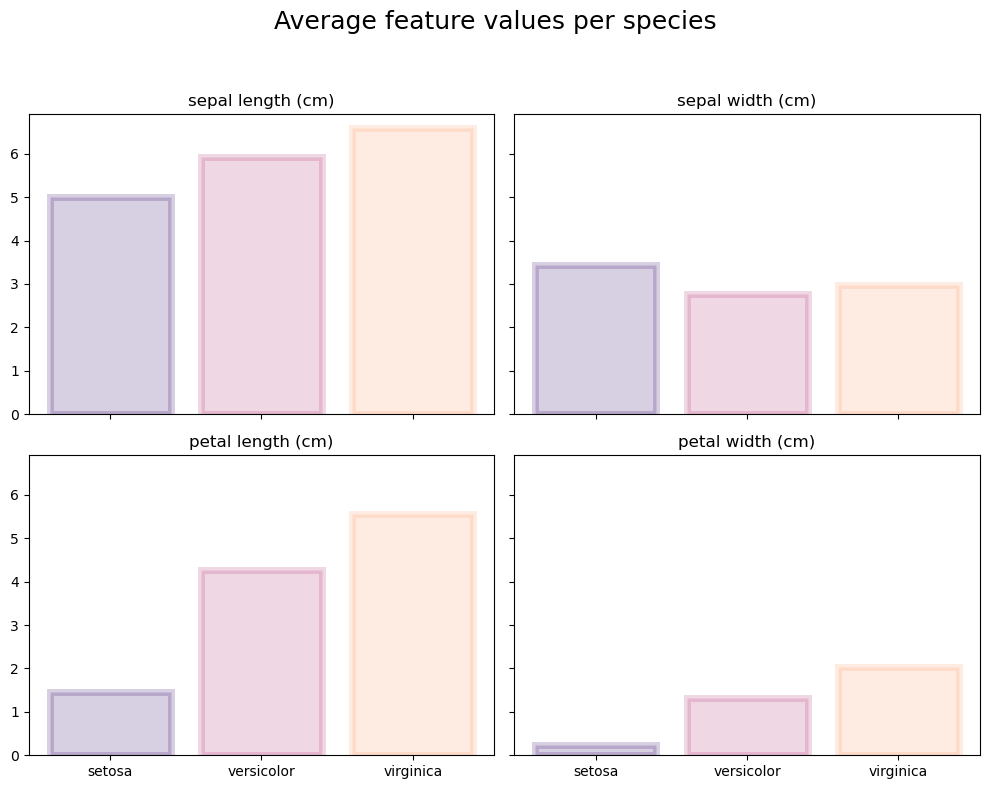

In [88]:
cmap = plt.cm.magma
color = [cmap(0.2), cmap(0.5), cmap(0.8)]

setosa_means = iris_x[setosa].mean(axis=0)
virginica_means = iris_x[virginica].mean(axis=0)
versicolor_means = iris_x[versicolor].mean(axis=0)

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,8))

for i,lab in enumerate(iris_x_labels):
    ax=axes[int(i/2), i%2]
    ax.bar([0,1,2], [setosa_means[i], versicolor_means[i], virginica_means[i]], color=color, alpha=0.2, edgecolor=color, linewidth=5)

    ax.set_title(iris_x_labels[i])
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(iris_y_labels)

fig.suptitle("Average feature values per species", size=18)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

In [89]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

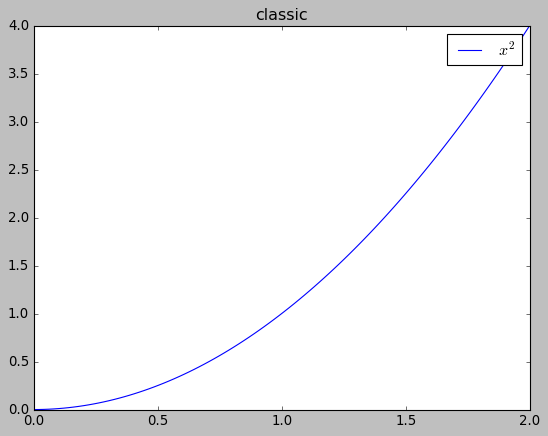

In [93]:
import random
style=random.choice(plt.style.available)
plt.style.use(style)

x=np.linspace(0,2,100)
plt.plot(x, x**2, label="$x^2$")
plt.title(style)
plt.legend()